In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
geo = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [5]:
X = pd.concat([X,geo,gender] , axis = 1)

In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [7]:
X = X.drop(['Geography','Gender'] , axis =1 )

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=1)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [13]:
X_test

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [15]:
import keras
from keras.models import Sequential

In [16]:
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [17]:
classifier = Sequential()

In [20]:
classifier.add(Dense(6 , kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))

In [22]:
classifier

In [23]:
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [25]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)


Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6122 - accuracy: 0.7490 - val_loss: 0.5718 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5478 - accuracy: 0.7918 - val_loss: 0.5235 - val_accuracy: 0.7993
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5077 - accuracy: 0.7936 - val_loss: 0.4935 - val_accuracy: 0.8016
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4811 - accuracy: 0.7959 - val_loss: 0.4741 - val_accuracy: 0.8054
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4638 - accuracy: 0.8000 - val_loss: 0.4615 - val_accuracy: 0.8046
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4530 - accuracy: 0.8020 - val_loss: 0.4538 - val_accuracy: 0.8027
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4464 - accuracy: 0.8054 - val_loss: 0.4482 - val_accuracy: 0.8046

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3832 - accuracy: 0.8410 - val_loss: 0.3916 - val_accuracy: 0.8372
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3816 - accuracy: 0.8419 - val_loss: 0.3901 - val_accuracy: 0.8383
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3802 - accuracy: 0.8414 - val_loss: 0.3887 - val_accuracy: 0.8395
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3787 - accuracy: 0.8421 - val_loss: 0.3870 - val_accuracy: 0.8406
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3770 - accuracy: 0.8423 - val_loss: 0.3851 - val_accuracy: 0.8417
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3753 - accuracy: 0.8459 - val_loss: 0.3830 - val_accuracy: 0.8417
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3733 - accuracy: 0.8453 - val_loss: 0.3809 - val_accuracy:

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

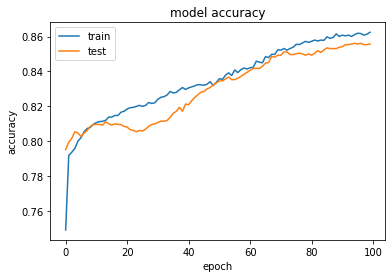

In [29]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


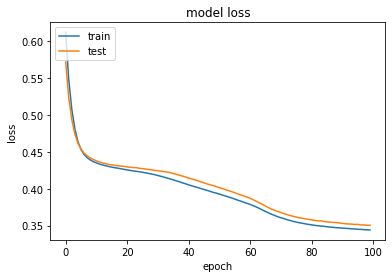

In [30]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [33]:
cm

array([[1524,   61],
       [ 224,  191]], dtype=int64)

In [34]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [35]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [36]:
score

0.8575